In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
unique_titles = pd.read_csv("unique_titles.csv")
mentorship_eligibility = pd.read_csv("mentorship_eligibility.csv")
retiring_titles = pd.read_csv("retiring_titles.csv", index_col="title")
mentorship_per_department = pd.read_csv("mentorship_per_department.csv")
retiring_per_department = pd.read_csv("retiring_per_department.csv")

In [4]:
unique_titles.head()

,emp_no,first_name,last_name,title
0,10001,Georgi,Facello,Senior Engineer
1,10004,Chirstian,Koblick,Senior Engineer
2,10005,Kyoichi,Maliniak,Senior Staff
3,10006,Anneke,Preusig,Senior Engineer
4,10009,Sumant,Peac,Senior Engineer


In [5]:
mentorship_eligibility.head()

,emp_no,first_name,last_name,birth_date,from_date,to_date,title
0,10095,Hilari,Morton,1965-01-03,1994-03-10,9999-01-01,Staff
1,10122,Ohad,Esposito,1965-01-19,1998-08-06,9999-01-01,Technique Leader
2,10291,Dipayan,Seghrouchni,1965-01-23,1987-03-30,9999-01-01,Senior Staff
3,10476,Kokou,Iisaka,1965-01-01,1987-09-20,9999-01-01,Senior Staff
4,10663,Teunis,Noriega,1965-01-09,1999-02-12,9999-01-01,Technique Leader


In [63]:
total_retiring = retiring_titles["count"].sum()
print(f"Total retiring: {total_retiring}")
retiring_titles["percentage"] = retiring_titles["count"] / total_retiring
retiring_titles
##retire_list.groupby("title")["emp_no"].count().sort_values(ascending=False)

Total retiring: 90398


,count,percentage
title,,
Senior Engineer,29414,0.325383
Senior Staff,28254,0.312551
Engineer,14222,0.157326
Staff,12243,0.135434
Technique Leader,4502,0.049802
Assistant Engineer,1761,0.019481
Manager,2,0.000022


Text(0.5, 1.0, 'Retiring Count Per Title')

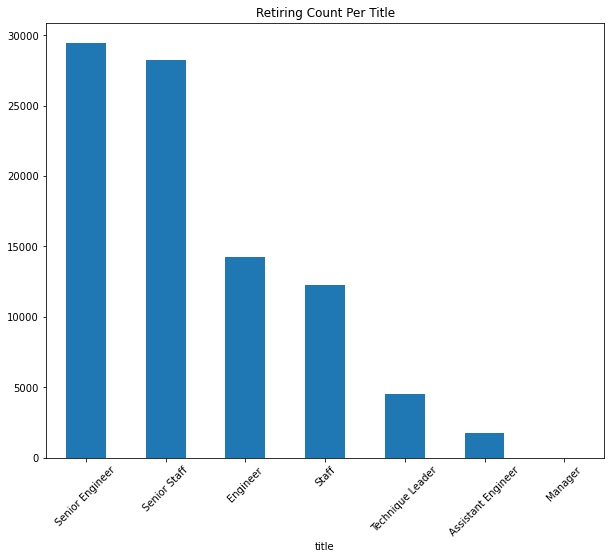

In [109]:
retiring_titles["count"].plot(kind="bar", rot = 45, figsize=(10,8))
plt.title("Retiring Count Per Title")

In [36]:
potential_new_leaders = mentorship_eligibility.shape[0]

Mentorships Elgible: 1549


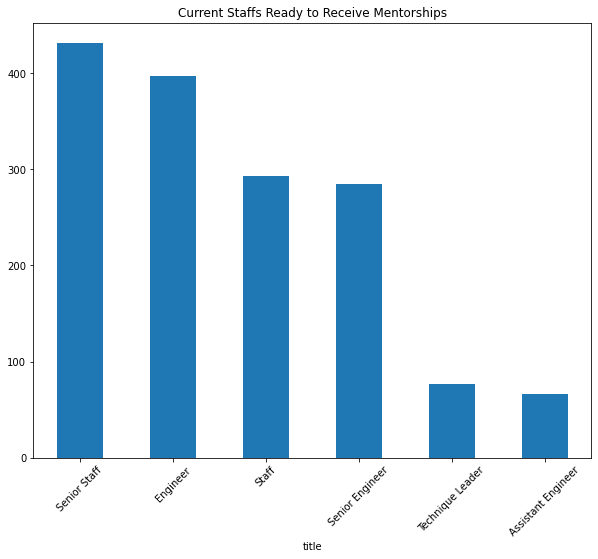

In [111]:
##total_next_leaders = mentorship_eligibility.groupby("title")["emp_no"].count().sum()
potential_new_leaders = mentorship_eligibility.shape[0]
print(f"Mentorships Elgible: {potential_new_leaders}")
mentorship_eligibility.groupby("title")["emp_no"].count().sort_values(ascending=False).plot(kind="bar", rot = 45, figsize=(10,8))
plt.title("Current Staffs Ready to Receive Mentorships")
plt.savefig("Current Staffs Ready to Receive Mentorships")


## Per Department

In [89]:
department.head(1)

,dept_name,count_retiring,count_mentor
0,Customer Service,2597,128


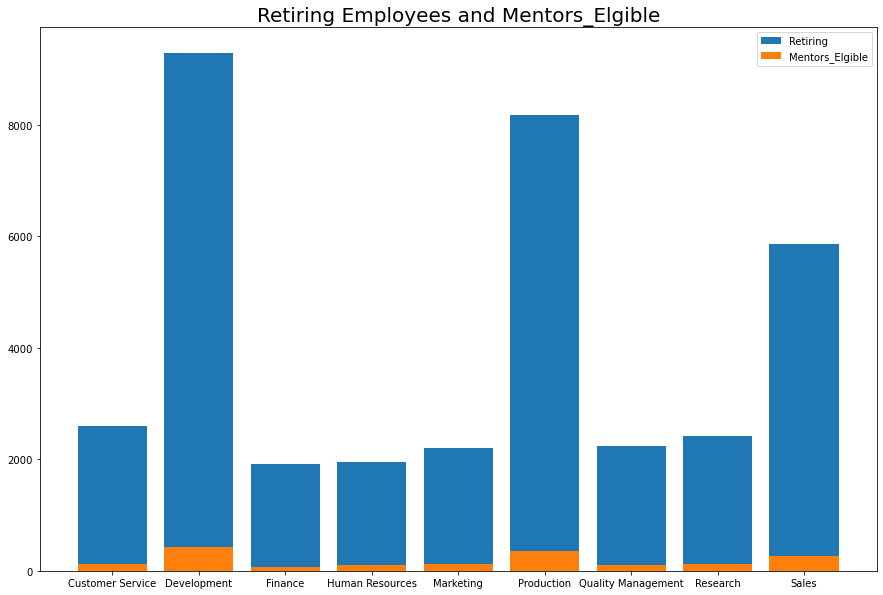

In [108]:
department = pd.merge(retiring_per_department, mentorship_per_department, on="dept_name", suffixes=("_retiring","_mentor"))

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(department["dept_name"],department["count_retiring"])
ax.bar(department["dept_name"],department["count_mentor"])

ax.legend(["Retiring","Mentors_Elgible"])
ax.set_title("Retiring Employees and Mentors_Elgible",fontsize=20)
plt.savefig("Retiring Employees and Mentors_Elgible")